In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.Handcap.max()

4

In [4]:
#check data types and all neccessary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#check for data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#preview datasets
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [7]:
#check the number of rows and columns
df.shape

(110527, 14)

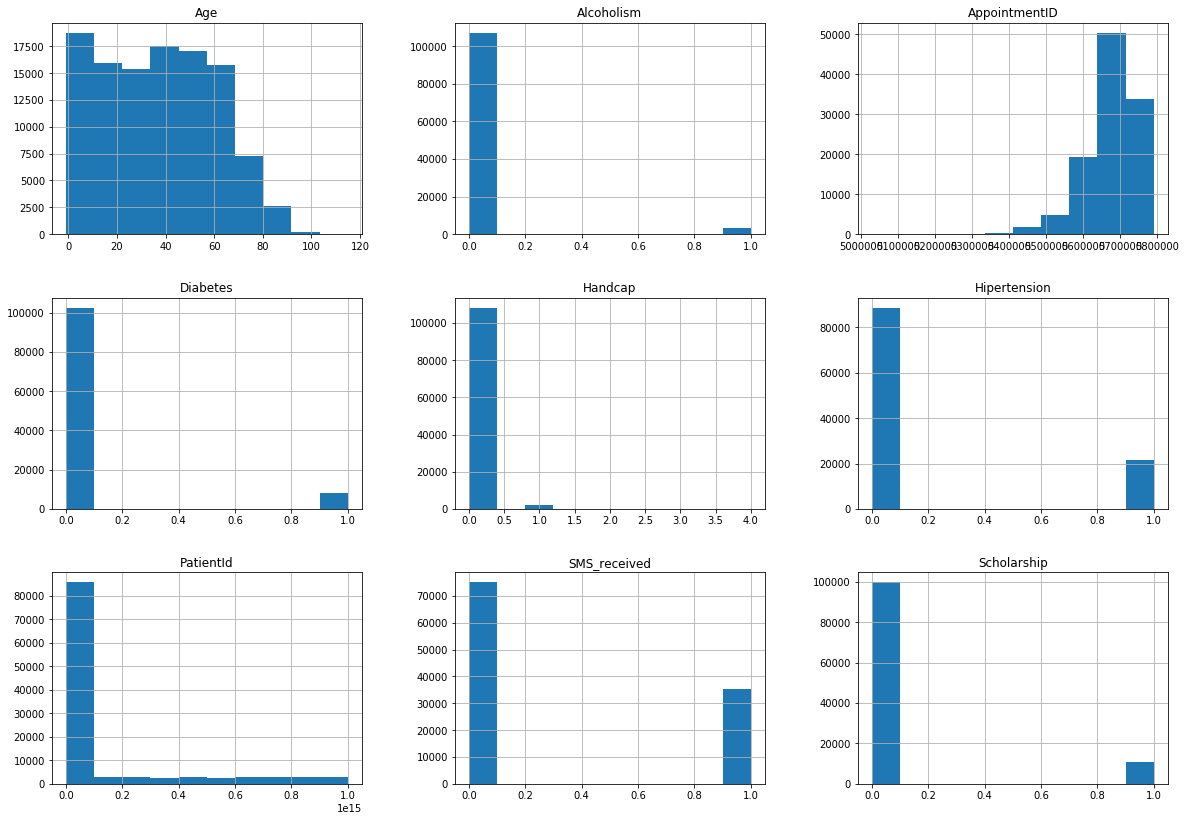

In [8]:
#Plot the histogram for better visualization of the important variables in the dataframe
df.hist(figsize=(20,14));

In [9]:
# check for missing values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### There are no missing values in the data set

In [10]:
#check for duplicated rows
df.duplicated().sum()

0

### Dataset does not contain any duplicates 

In [11]:
# check total unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Data Validation

In [12]:
#rename misspelt columns
df.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension'}, inplace=True)

In [13]:
# replace values No and Yes in 'No-show'column to 'Present' and 'Absent' respectively
#df['No-show'].replace(['No','Yes'],['Present','Absent'], inplace=True)

In [14]:
df['No-show'] = df['No-show'].map({'Yes': 'Absent', 'No': 'Present'})

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Present
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Present
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Present
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Present


In [16]:
# replace values 0 and 1 in 'SMS_received'column to 'No' and 'Yes' respectively
df['SMS_received'].replace([0,1],['No','Yes'], inplace=True)

In [17]:
# Age can not be -ve hence change all values to absolute
df['Age'] = abs(df['Age'])

In [18]:
#Confirming if age has been rectified
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708889e+01,2.311018e+01,0.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hypertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handicap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


In [19]:
df.Handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [20]:
#Handcap has an outlier of 4 which should be dropped? No
df.drop(df[df['Handicap'] >1].index, axis=0, inplace=True)


In [21]:
#recheck if all errors in describe have been corrected
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap
count,1.103280e+05,1.103280e+05,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000
mean,1.475273e+14,5.675299e+06,37.070426,0.098280,0.196831,0.071605,0.030382,0.018508
std,2.561394e+14,7.129914e+04,23.098202,0.297694,0.397606,0.257833,0.171637,0.134781
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174654e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680568e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725510e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#Comment based on statistical summary

#The dataset contains 110328 values and 32% received SMS
#1.8% of the Patients suffer from Handcap, 3% of the patients suffer from Alcoholism, 7.1% suffers from diabeties
#19.6% suffers fron hypertension, 
#The majority of the patients are adults, accounting for 75% of the population of patient records
#Children of less than 2 years old are the least number of patients

In [23]:
# recheck dataset
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No,Present
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No,Present
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No,Present
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No,Present
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No,Present
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,No,Present
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,No,Absent
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,No,Absent
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,No,Present
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,No,Present


### Questions
- What is the effect of sending SMS and patient showing up on the day of appointment?
- Did scholarship affect patients showing up for appointment?
- What age range showed up more?

##Question 1: What is the effect of sending SMS and patient showing up on the day of appointment?

In [24]:
#Check No show rate with SMS_received
df.pivot_table(values='PatientId', index='SMS_received', columns='No-show',margins=True, aggfunc=np.count_nonzero).assign(present_pct= lambda x: x.Present *100/x.All)

No-show,Absent,Present,All,present_pct
SMS_received,,,,
No,12503.0,62390.0,74893.0,83.305516
Yes,9775.0,25660.0,35435.0,72.414280
All,22278.0,88050.0,110328.0,79.807483


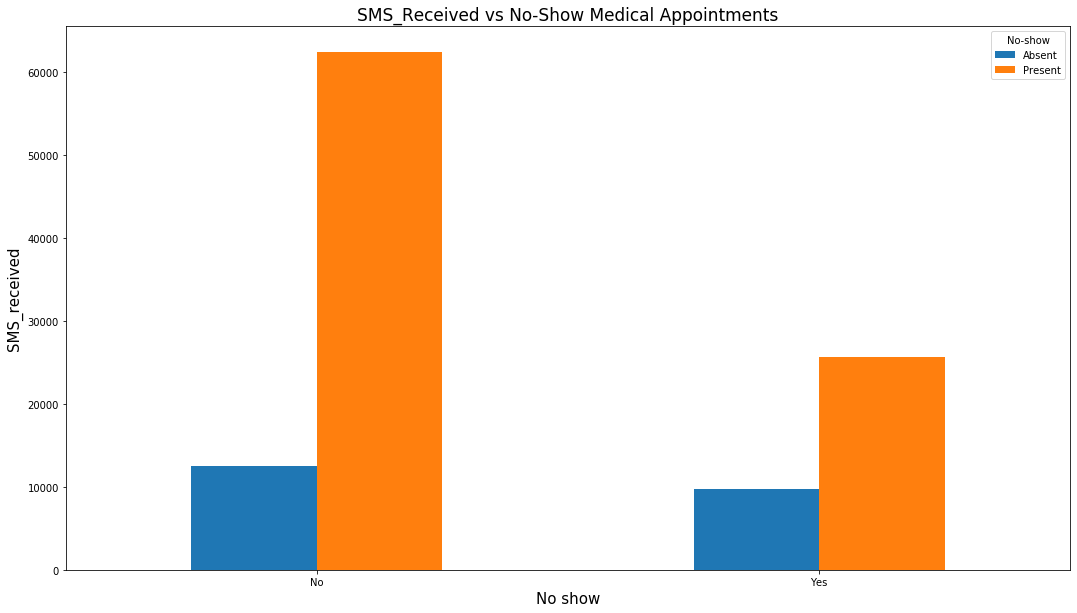

In [25]:
#USe bar chart for visualisation
df.pivot_table(values='PatientId', index='SMS_received', columns='No-show', aggfunc=np.count_nonzero).plot(kind='bar', rot=0, figsize=(18,10));
plt.ylabel('SMS_received', size=15)
plt.xlabel('No show', size=15)
plt.title('SMS_Received vs No-Show Medical Appointments', size =17);

### Summary
Patients who received the SMS and showed up amounts to about 72.4% of the total patients who received SMS

### Question 2: effect of scholarship on showing up for appointment

In [26]:
#Check effect of Scholarship on No-show rate
df.pivot_table(values='PatientId', index='Scholarship', columns='No-show',margins=True, aggfunc=np.count_nonzero).assign(present_pct= lambda x: x.Present *100/x.All)

No-show,Absent,Present,All,present_pct
Scholarship,,,,
0,19701.0,79784.0,99485.0,80.197015
1,2577.0,8266.0,10843.0,76.233515
All,22278.0,88050.0,110328.0,79.807483


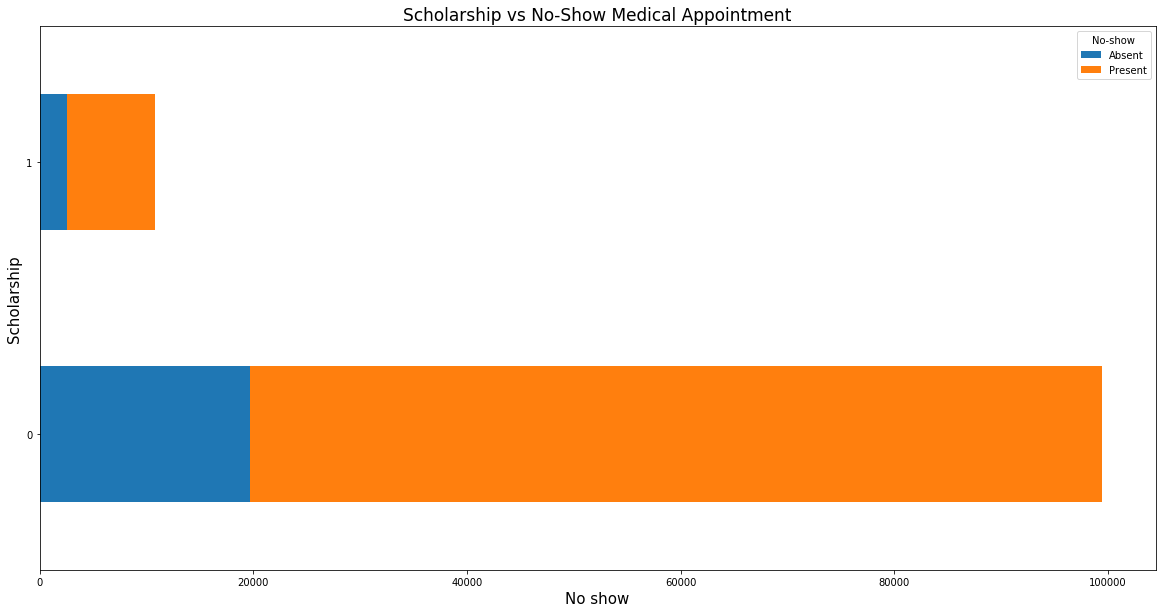

In [27]:
#Use chart for better visualisation
df.pivot_table(values='PatientId', index='Scholarship', columns='No-show', aggfunc=np.count_nonzero).plot(kind='barh', stacked=True, rot=0, title='Scholarship vs No-Show Medical Appointments', figsize=(20,10));
plt.ylabel('Scholarship', size=15)
plt.xlabel('No show', size=15)
plt.title('Scholarship vs No-Show Medical Appointment', size =17);

In [28]:
df.loc[:,'No-show']= df.loc[:,'No-show'].apply(lambda x:0 if x=='Present' else 1)
df.groupby('Scholarship').mean().loc[:,'No-show']

Scholarship
0    0.198030
1    0.237665
Name: No-show, dtype: float64

In [29]:
#People with No-show rate despite receiving scholarship are 23% while people without scholarship no show rate are 19%.  

### Summary:About  80% of the total patients of the hospital didnt receive scholarships and 19% of them didnt show up for their appointment

### Question 3:  What age range showed up more for their medical appointment

In [30]:
#Categorize age into groups: less than or equals to 1-18 = Children, 18-37 = Teenagers, 37-55 = Adults, 55 and above =Old_Age
#define the function filter
def filter(z):
    if (z>1 and z<=18):
        return 'Children'
    if (z>18 and z<=37):
        return 'Teenagers'
    if (z>37 and z<=55):
        return 'Adults'
    if z> 55:
        return 'Old_Age'
    
#inserting the filter into the Age column
df['Age range'] = df['Age'].apply(filter)

In [31]:
# #Using the bin
# bin_edges = [1,18,37,55,115 ]
# bin_names = ['Children','Teenagers','Adults','Old_Age']
# df['Age range'] =  pd.cut(df.Age, bin_edges, labels = bin_names)


In [32]:
#Confirm Age range column
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age range
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No,0,Old_Age
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No,0,Old_Age
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No,0,Old_Age
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,Children
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No,0,Old_Age


In [33]:
df['No-show'] = df['No-show'].map({1: 'Absent', 0: 'Present'})

In [34]:
df['No-show'].value_counts()

Present    88050
Absent     22278
Name: No-show, dtype: int64

In [35]:
# get a variable df_present, that shows only rows of patients that were present
df_present = df[df['No-show'] =='Present']

In [36]:
df_present.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age range
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No,Present,Old_Age
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No,Present,Old_Age
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No,Present,Old_Age
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No,Present,Children
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No,Present,Old_Age


In [37]:
df_range = df_present.groupby('Age range')['PatientId'].count().reindex(['Children','Teenagers','Adults','Old_Age'])

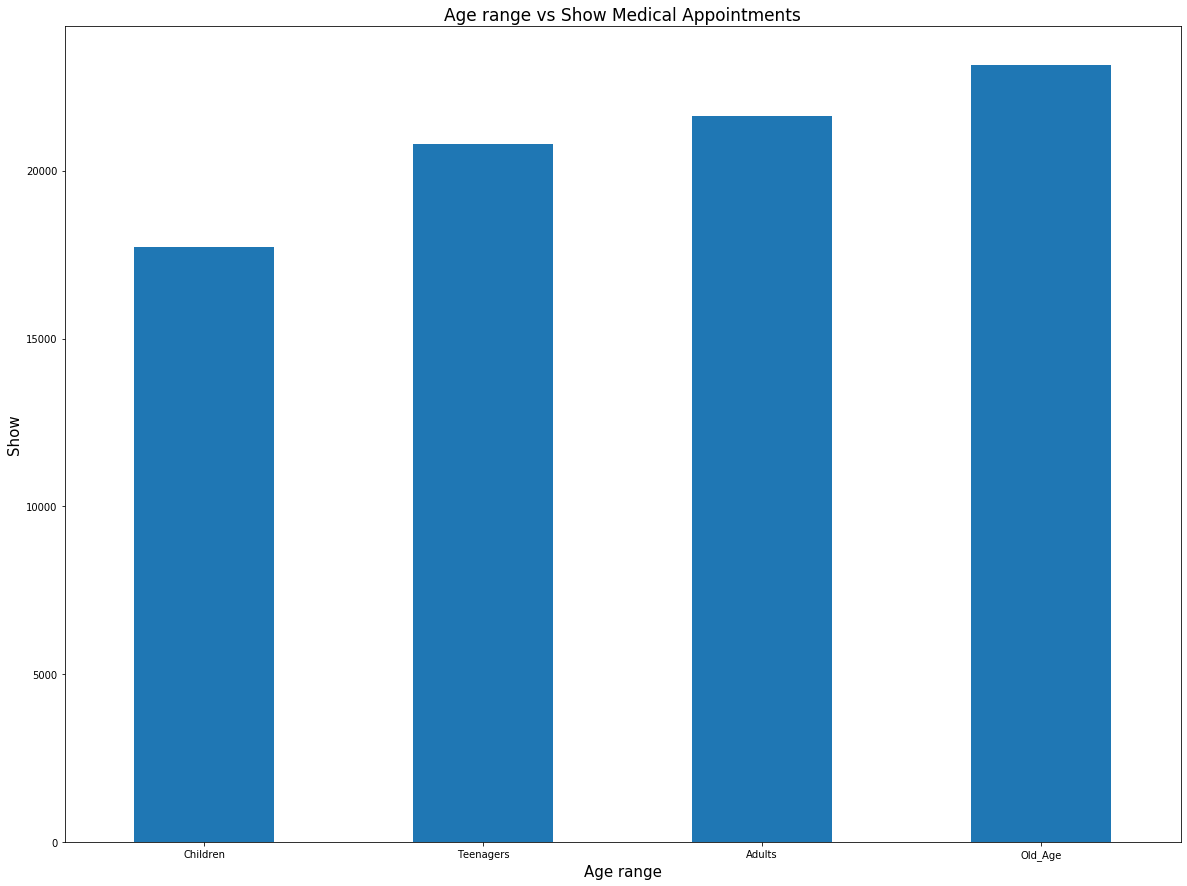

In [38]:
df_range.plot(kind='bar', rot=0, title='How Well Age Groups Showed Up', figsize=(20,15))
plt.ylabel('Show', size=15)
plt.xlabel('Age range', size=15)
plt.title('Age range vs Show Medical Appointments', size =17);

Text(0.5, 1.0, 'Age group that showed up')

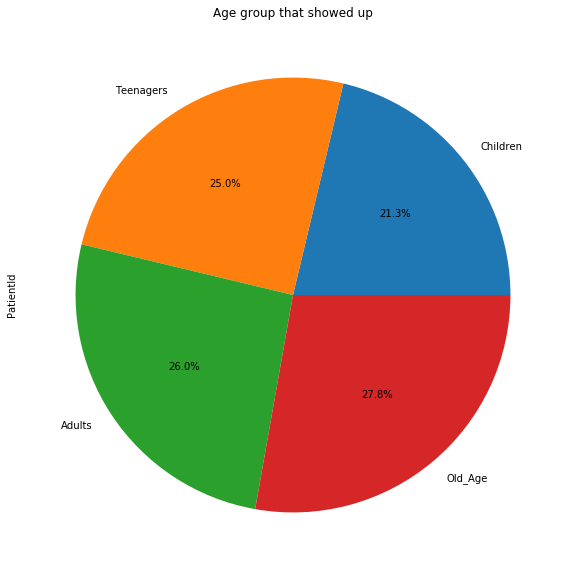

In [39]:
#Use pie chart for better visualisation
df_range.reindex(['Children','Teenagers','Adults','Old_Age']).plot(kind='pie',autopct='%.1f%%', figsize=(20,10));
plt.title('Age group that showed up')

In [40]:
#Total number of patients within each age range
pd.DataFrame(df['Age range'].value_counts())

,Age range
Old_Age,27426
Teenagers,27212
Adults,26870
Children,23007


In [41]:
#Patients that were present and absent by age category
df.pivot_table(columns='No-show', index='Age range', values='PatientId', aggfunc=[np.count_nonzero])

count_nonzero         
No-show          Absent  Present
Age range                       
Adults           5247.0  21623.0
Children         5286.0  17721.0
Old_Age          4283.0  23143.0
Teenagers        6408.0  20804.0

In [42]:
#Checking for the percentage of the patient that were present in each category
round(df.pivot_table(columns='No-show', index='Age range', values='PatientId',margins=True, aggfunc=[np.count_nonzero])*100/ df['PatientId'].count(), 1)

count_nonzero              
No-show          Absent Present   All
Age range                            
Adults              4.8    19.6  24.4
Children            4.8    16.1  20.9
Old_Age             3.9    21.0  24.9
Teenagers           5.8    18.9  24.7
All                19.2    75.5  94.7

Text(0.5, 1.0, 'Age range vs No-show (Present/Absent)')

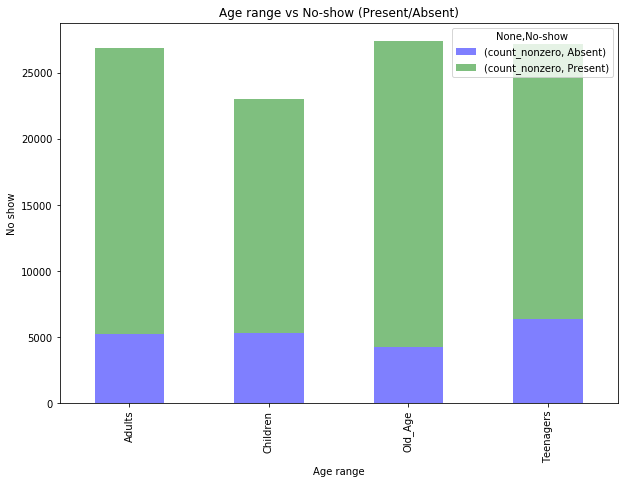

In [43]:
df.pivot_table(columns='No-show', index='Age range', values='Age', aggfunc=[np.count_nonzero]).plot(kind='bar', stacked=True, figsize=(10,7),alpha=0.5, color=['Blue','Green']);
plt.ylabel('No show')
plt.xlabel('Age range')
plt.title("Age range vs No-show (Present/Absent)")

### Summary
#1. Old Age have a total population of 24% in the total number of patients with 21% of adults showing up for their appointments
#2. Adults account for 24% of the population with a show rate of 19%
#4. Children show up rate accounts for 16% of the total 20% of population among patients
#5. Teenagers show up rate 18% of the entire 24% Young adults population

#Hence, it is assumed that majority of the patients with ill healths that visit the hospital for their appointments are OLd_Age!